In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# Load data from Excel file
df = pd.read_excel('1H(n,y).xlsx')  # Make sure to specify the correct path and sheet if needed

# Extract columns into NumPy arrays
E_1H_a = df['E'].values
sigma_1H_a = df['sigma'].values

# Create log-log interpolation function
log_interp = interp1d(np.log(E_1H_a), np.log(sigma_1H_a), kind='linear', fill_value='extrapolate')

# Define interpolated sigma function
def sigma_E(E):
    return np.exp(log_interp(np.log(E)))


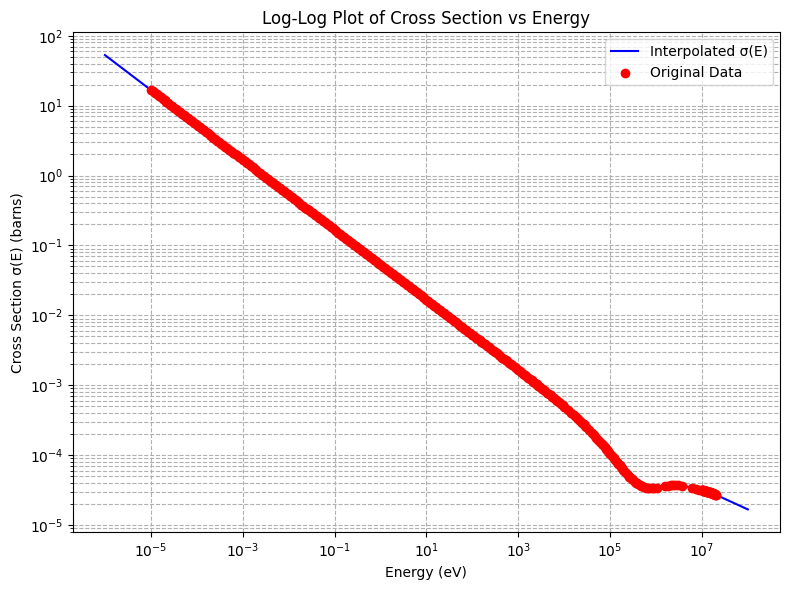

In [3]:
# Generate energy range from 10^-6 to 10^8 eV (log-spaced)
E_range = np.logspace(-6, 8, num=500)

# Calculate interpolated sigma values
sigma_range = sigma_E(E_range)

# Plot
plt.figure(figsize=(8, 6))
plt.loglog(E_range, sigma_range, label='Interpolated σ(E)', color='blue')
plt.scatter(E_1H_a, sigma_1H_a, color='red', label='Original Data', zorder=5)
plt.xlabel('Energy (eV)')
plt.ylabel('Cross Section σ(E) (barns)')
plt.title('Log-Log Plot of Cross Section vs Energy')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
export_df = pd.DataFrame({
    'E (eV)': E_range,
    'sigma (barns)': sigma_range
})

# Export to CSV
export_df.to_csv('interpolated_E_sigma_1H_a.csv', index=False)